In [22]:
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [23]:
with open('./models-pkl/census.pkl', 'rb') as f:
    x_census_treino, x_census_teste, y_census_treino, y_census_teste = pickle.load(f)

In [24]:
x_census_treino.shape, y_census_treino.shape

((39073, 108), (39073,))

In [25]:
x_census_teste.shape, y_census_teste.shape

((9769, 108), (9769,))

In [22]:
naive_census = GaussianNB()
naive_census.fit(x_census_treino, y_census_treino)
previsor = naive_census.predict(x_census_teste)


In [23]:
accuracy_score(y_census_teste, previsor)


0.5248234210256936

0.5248234210256936

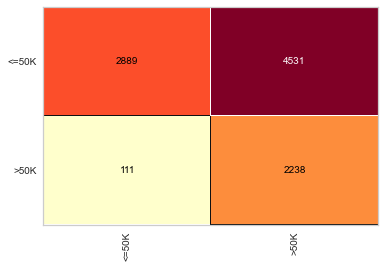

In [24]:
cm = ConfusionMatrix(naive_census)
cm.fit(x_census_treino, y_census_teste)
cm.score(x_census_teste, y_census_teste)

In [25]:
print(classification_report(y_census_teste, previsor))

              precision    recall  f1-score   support

       <=50K       0.96      0.39      0.55      7420
        >50K       0.33      0.95      0.49      2349

    accuracy                           0.52      9769
   macro avg       0.65      0.67      0.52      9769
weighted avg       0.81      0.52      0.54      9769



In [27]:
arvore_census = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
arvore_census.fit(x_census_treino, y_census_treino)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [29]:
previsor_arvore = arvore_census.predict(x_census_teste)
accuracy_score(y_census_teste, previsor_arvore)

0.8163578667212611

0.8163578667212611

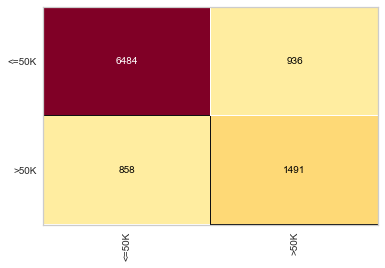

In [32]:
cm = ConfusionMatrix(arvore_census)
cm.fit(x_census_treino, y_census_teste)
cm.score(x_census_teste, y_census_teste)

In [33]:
print(classification_report(y_census_teste, previsor_arvore))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88      7420
        >50K       0.61      0.63      0.62      2349

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769



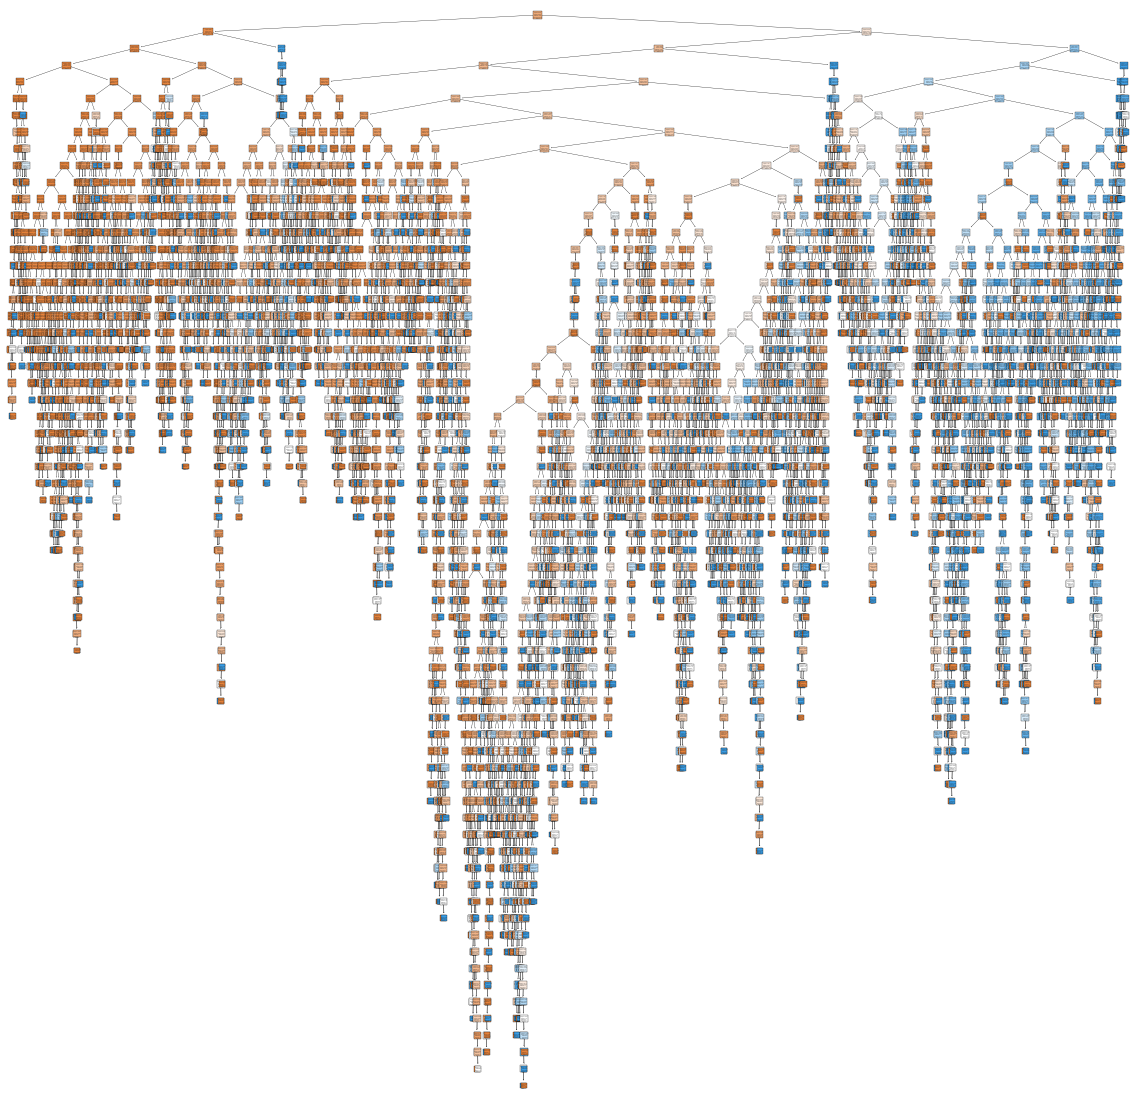

In [42]:
previsores_arvore = ['income','age', 'loan']
fig, azes = plt.subplots(nrows=1, ncols=1, figsize = (20,20))
tree.plot_tree(arvore_census, feature_names=previsor_arvore, class_names=str(arvore_census.classes_),
              filled = True)
plt.show()

In [26]:
censu_random = RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=0)
censu_random.fit(x_census_teste,y_census_teste)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [27]:
previsores_rd = censu_random.predict(x_census_teste)
accuracy_score(y_census_teste,previsores_rd)

0.9998976353772137

0.9998976353772137

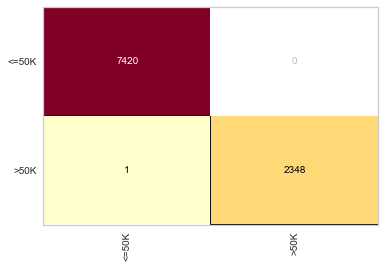

In [30]:
cm = ConfusionMatrix(censu_random)
cm.fit(x_census_treino, y_census_treino)
cm.score(x_census_teste, y_census_teste)

In [31]:
print(classification_report(y_census_teste, previsores_rd))

              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00      7420
        >50K       1.00      1.00      1.00      2349

    accuracy                           1.00      9769
   macro avg       1.00      1.00      1.00      9769
weighted avg       1.00      1.00      1.00      9769

